<a href="https://colab.research.google.com/github/mandesss/03-2241720153-PemrogramanMobile/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Praktikum

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan: 50


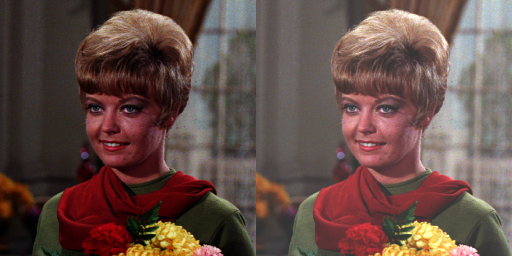

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

print('Mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK_2024/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range (original.shape[0]):
    for x in range(original.shape[1]):
      for c in range(original.shape[2]):
        brightness_image [y, x, c] = np.clip(original[y, x, c] + brightness, 0 ,255)

#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)
final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

# Tugas Praktikum

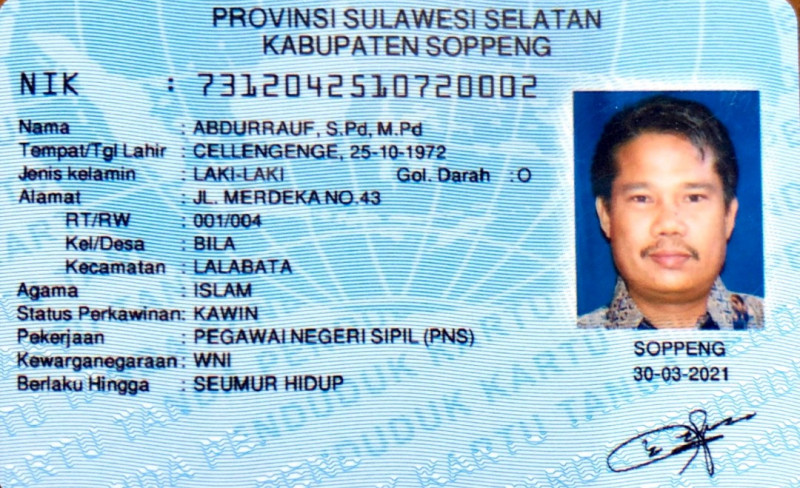

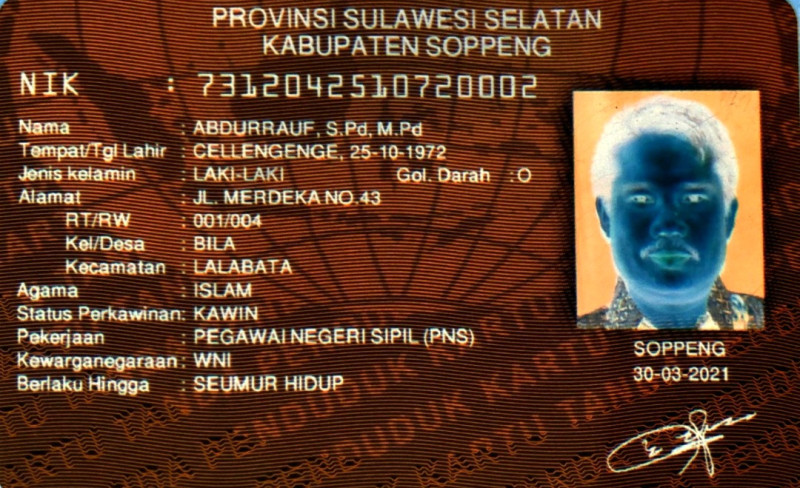

In [9]:
gambarKTP = cv.imread('/content/drive/MyDrive/PCVK_2024/week 1/KTP.jpg')
cv2_imshow(gambarKTP)

#inversi image
inverse_image = 255 - gambarKTP
cv2_imshow(inverse_image)

Mengubah kontras dan tingkat kecerahan citra
--------------------------------
Masukkan tingkat kecerahan [-255 - 255]: 50
Masukkan kontras [1.0 - 3.0]: 2


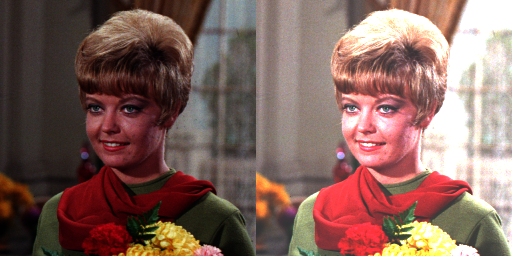

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

print('Mengubah kontras dan tingkat kecerahan citra')
print('--------------------------------------------')
try:
  brightness = int(input('Masukkan tingkat kecerahan [-255 - 255]: '))
  contrast = float(input('Masukkan kontras [1.0 - 3.0]: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK_2024/Images/female.tiff')
brightness_contrast_image = np.zeros(original.shape, original.dtype)

# Akses per piksel untuk perubahan brightness dan contrast
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
      for c in range(original.shape[2]):
          # Menerapkan formula brightness dan contrast
          brightness_contrast_image[y, x, c] = np.clip(original[y, x, c] * contrast + brightness, 0, 255)

# Menggunakan OpenCV untuk menampilkan gambar asli dan hasil transformasi
final_frame = cv.hconcat([original, brightness_contrast_image])
cv2_imshow(final_frame)

Mengubah tingkat kecerahan citra dengan Tranformasi Log
-------------------------------------------------------
Masukkan nilai kecerahan: 50


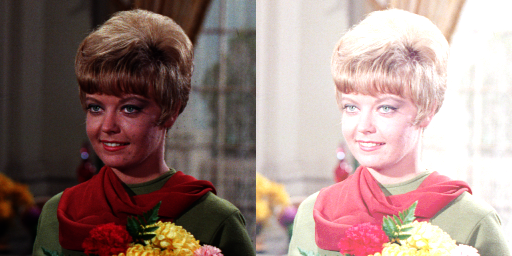

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

print('Mengubah tingkat kecerahan citra dengan Tranformasi Log')
print('-------------------------------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK_2024/Images/female.tiff')
# Ubah gambar menjadi tipe float untuk transformasi logaritmik
original_float = original.astype(np.float32)

# Menghitung konstanta c berdasarkan intensitas maksimum
c = 255 / np.log(1 + np.max(original_float))

# Terapkan transformasi logaritmik pada setiap piksel
log_image = c * np.log(1 + original_float)

# Terapkan nilai kecerahan setelah transformasi logaritmik
log_brightness_image = np.clip(log_image + brightness, 0, 255)

# Konversi kembali ke tipe uint8
log_brightness_image = np.uint8(log_brightness_image)

# Menampilkan gambar asli dan hasil transformasi logaritmik
final_frame = cv.hconcat([original, log_brightness_image])
cv2_imshow(final_frame)

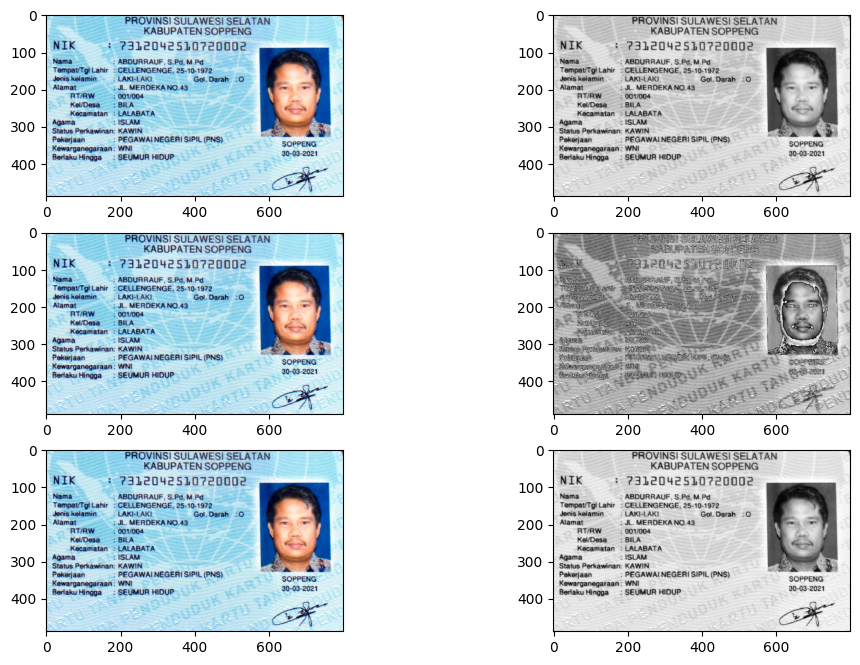

In [24]:
# Membaca gambar KTP
gambarKTP = cv.imread('/content/drive/MyDrive/PCVK_2024/week 1/KTP.jpg')

# Ubah gambar ke format RGB untuk ditampilkan dengan benar
KTPRGB = cv.cvtColor(gambarKTP, cv.COLOR_BGR2RGB)

# Metode 1: Averaging
def grayscale_averaging(image):
    return np.mean(image, axis=2).astype(np.uint8)

# Metode 2: Lightness
def grayscale_lightness(image):
    max_rgb = np.max(image, axis=2)
    min_rgb = np.min(image, axis=2)
    return ((max_rgb + min_rgb) / 2).astype(np.uint8)

# Metode 3: Luminance
def grayscale_luminance(image):
    return (0.2989 * image[:, :, 2] + 0.5870 * image[:, :, 1] + 0.1140 * image[:, :, 0]).astype(np.uint8)

# Terapkan ketiga metode
gray_averaging = grayscale_averaging(KTPRGB)
gray_lightness = grayscale_lightness(KTPRGB)
gray_luminance = grayscale_luminance(KTPRGB)

# Tampilkan gambar asli dan hasil transformasi grayscale dengan ketiga metode
plt.figure(figsize=(12, 8))

# Gambar Asli
plt.subplot(3, 2, 1)
plt.imshow(KTPRGB)

# Metode Averaging
plt.subplot(3, 2, 2)
plt.imshow(gray_averaging, cmap='gray')

# Gambar Asli
plt.subplot(3, 2, 3)
plt.imshow(KTPRGB)

# Metode Lightness
plt.subplot(3, 2, 4)
plt.imshow(gray_lightness, cmap='gray')

# Gambar Asli
plt.subplot(3, 2, 5)
plt.imshow(KTPRGB)

# Metode Luminance
plt.subplot(3, 2, 6)
plt.imshow(gray_luminance, cmap='gray')

plt.show()


In [ ]:
# Membaca gambar KTP
gambarKTP = cv.imread('/content/drive/MyDrive/PCVK_2024/week 1/KTP.jpg')

# Ubah gambar ke format RGB untuk ditampilkan dengan benar
KTPRGB = cv.cvtColor(gambarKTP, cv.COLOR_BGR2RGB)

# Metode 1: Averaging
def grayscale_averaging(image):
    return np.mean(image, axis=2).astype(np.uint8)

# Metode 2: Lightness
def grayscale_lightness(image):
    max_rgb = np.max(image, axis=2)
    min_rgb = np.min(image, axis=2)
    return ((max_rgb + min_rgb) / 2).astype(np.uint8)

# Metode 3: Luminance
def grayscale_luminance(image):
    return (0.2989 * image[:, :, 2] + 0.5870 * image[:, :, 1] + 0.1140 * image[:, :, 0]).astype(np.uint8)

# Terapkan ketiga metode
gray_averaging = grayscale_averaging(KTPRGB)
gray_lightness = grayscale_lightness(KTPRGB)
gray_luminance = grayscale_luminance(KTPRGB)

# Tampilkan gambar asli dan hasil transformasi grayscale dengan ketiga metode
plt.figure(figsize=(12, 8))

# Gambar Asli
plt.subplot(3, 2, 1)
plt.imshow(KTPRGB)

# Metode Averaging
plt.subplot(3, 2, 2)
plt.imshow(gray_averaging, cmap='gray')

# Gambar Asli
plt.subplot(3, 2, 3)
plt.imshow(KTPRGB)

# Metode Lightness
plt.subplot(3, 2, 4)
plt.imshow(gray_lightness, cmap='gray')

# Gambar Asli
plt.subplot(3, 2, 5)
plt.imshow(KTPRGB)

# Metode Luminance
plt.subplot(3, 2, 6)
plt.imshow(gray_luminance, cmap='gray')

plt.show()